# Grip: The Spark Foundation

# Data Science and Business Anlytics Internship

# Task 1: Prediction using Supervised ML

### Author: Aakash Bari

## To predict the percentage of an student based on the number of study hours 

# Importing required Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the data from link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


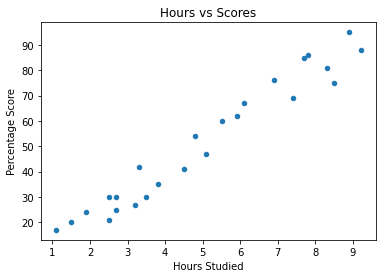

In [6]:
# plotting the distribution of the scores
data.plot.scatter(x='Hours',y='Scores')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

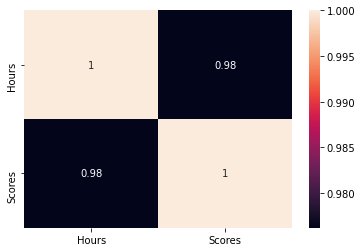

In [7]:
# plotting the correlation of the data
sns.heatmap(data.corr(),annot=True)
plt.show()

### The correlation between Hours and Scores is 0.98 Hence both the variables are positively correlated.

### Preparing the data

In [8]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

### Splinting the data into training and testing 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Training the Algorithm

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train,y_train) 

LinearRegression()

In [12]:
line=regressor.intercept_+regressor.coef_*X

In [13]:
# Equation of the  line
print('The equation of the line is \n')
print('y={}+{}*X\n'.format(regressor.intercept_,regressor.coef_[0]))

The equation of the line is 

y=2.018160041434683+9.910656480642237*X



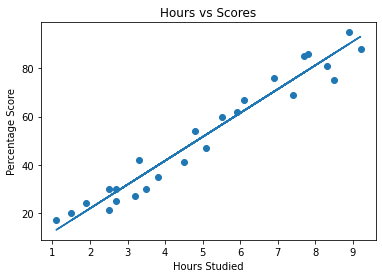

In [14]:
plt.scatter(X,y)
plt.plot(X,line)
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Making Predictions

In [15]:
y_pred=regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
hour=[[9.25]]
score=regressor.predict(hour)
print('number of hour = {}'.format(hour[0]))
print('predicted score = {}'.format(score[0]))

number of hour = [9.25]
predicted score = 93.69173248737538


### Result
### If a student studies for 9.25 hours the student will get 93.69% score

# Evaluating the model

In [18]:
from sklearn import metrics

In [19]:
print('mean absolute error :' ,metrics.mean_absolute_error(y_test,y_pred))

mean absolute error : 4.183859899002975


In [20]:
print('R2 Score :',metrics.r2_score(y_test,y_pred))

R2 Score : 0.9454906892105356


### 94% of variation in dependent variable is explained by independent variable with mean aboslute error 4.18 .